In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
tf.__version__

2022-01-24 18:46:03.315647: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 18:46:03.315678: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.7.0'

In [2]:
keras.__version__

'2.7.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train,X_test = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0, X_test / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

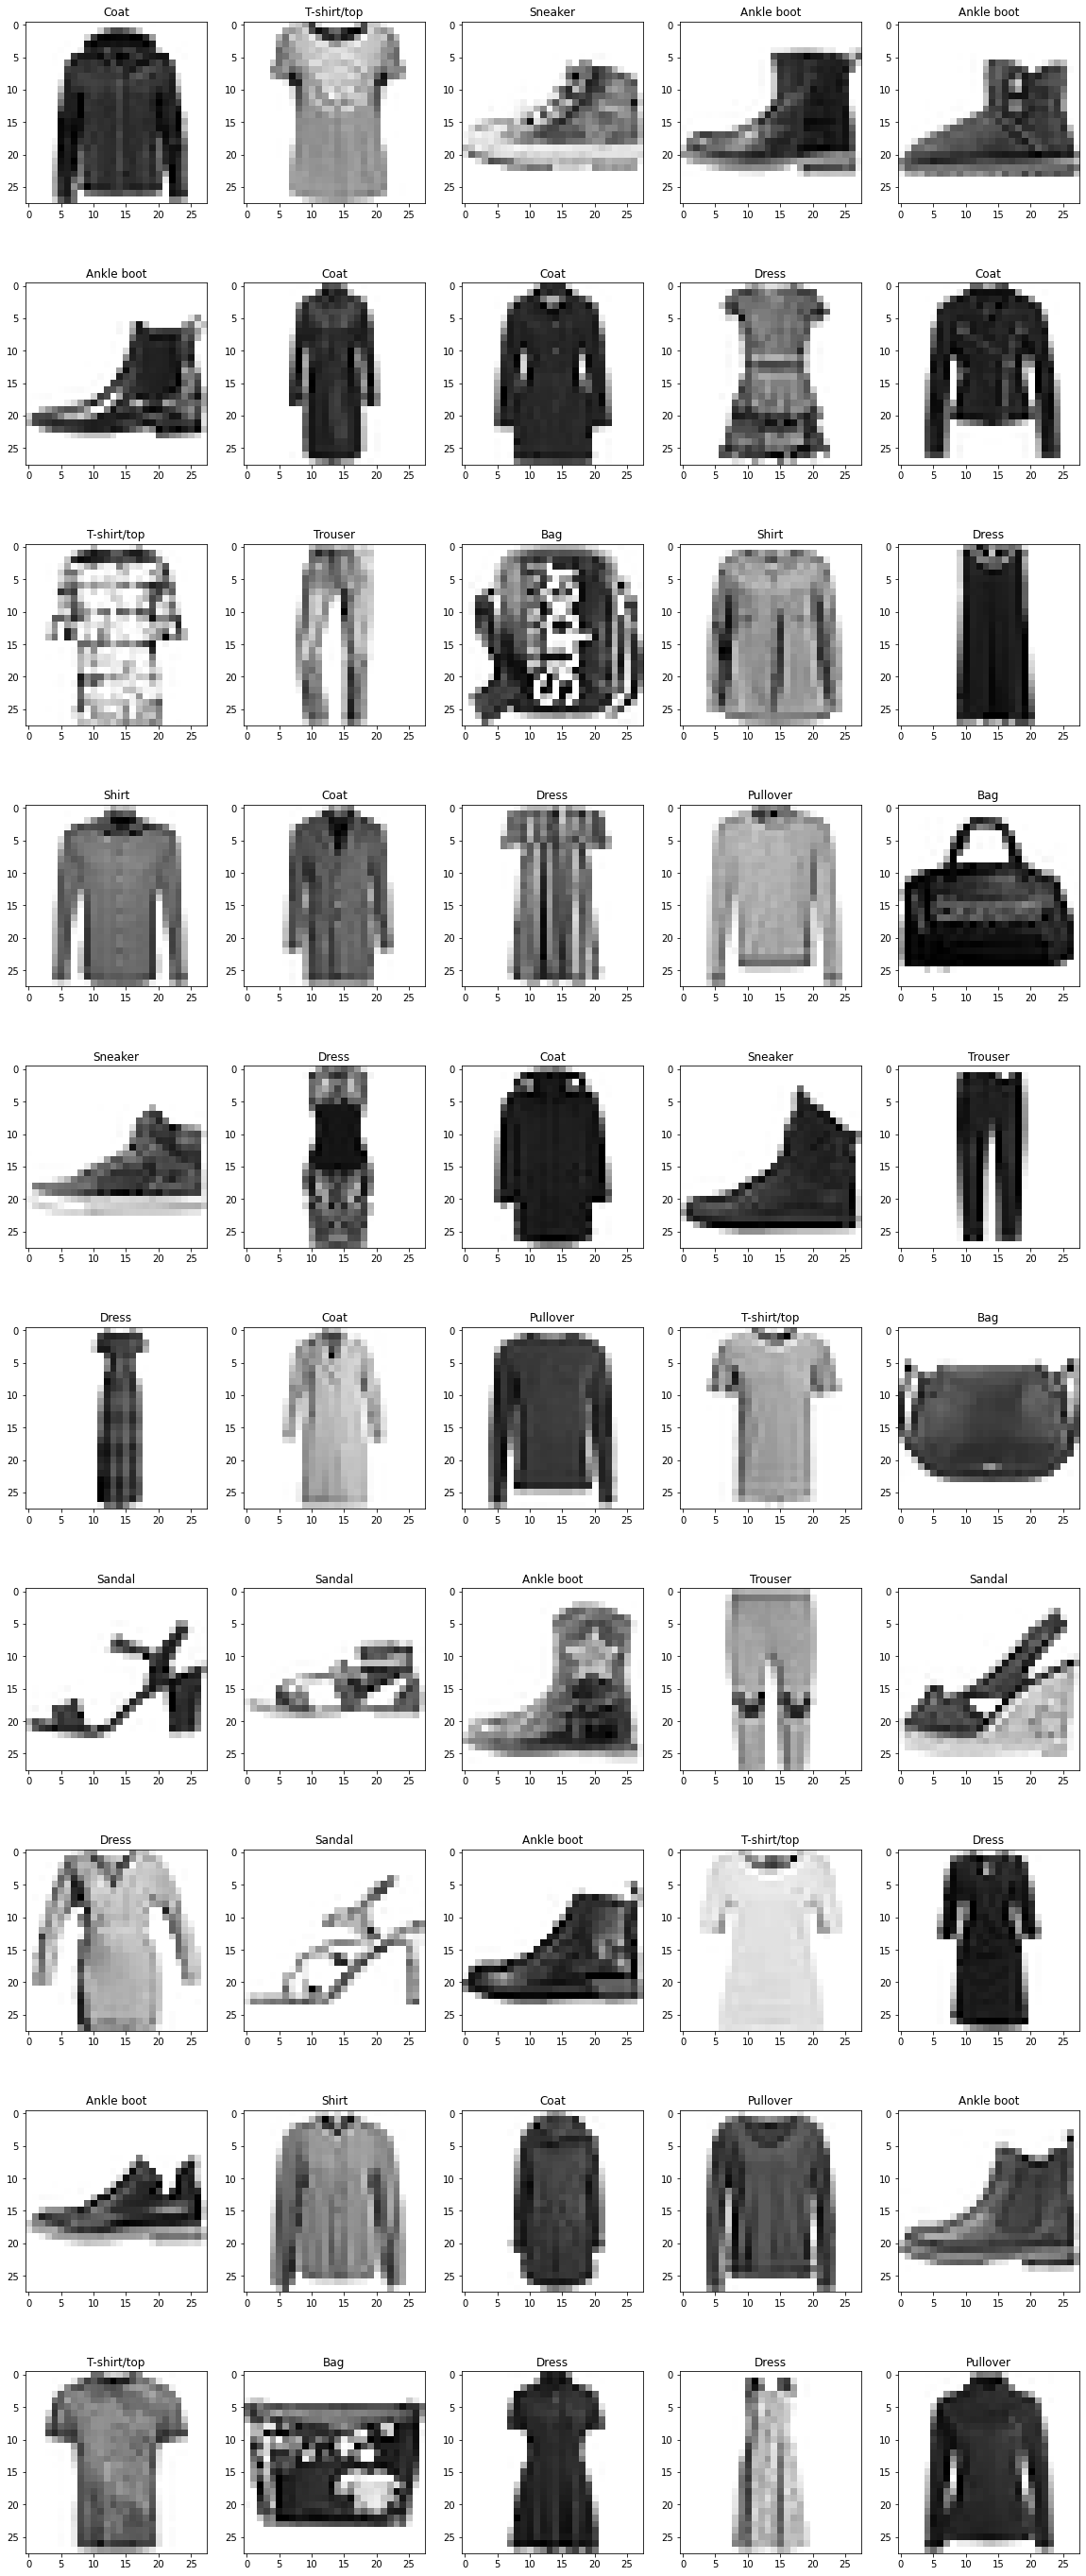

In [6]:
items_size=50
cols=5
fig, ax = plt.subplots(items_size//cols,cols)
fig.set_size_inches(20, 50)

for i in range(items_size):
    ax[i//cols,i%cols].imshow(X_train[i],cmap='binary')
    ax[i//cols,i%cols].set_title(class_names[y_train[i]])



In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2022-01-24 18:46:12.137697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-24 18:46:12.137730: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-24 18:46:12.137749: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bb): /proc/driver/nvidia/version does not exist
2022-01-24 18:46:12.138121: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
weights,biases = model.layers[1].get_weights()

In [11]:
weights.shape

(784, 300)

In [12]:
weights

array([[-4.0840041e-02, -7.1798556e-02,  1.7740250e-02, ...,
         6.6395104e-03,  4.0732235e-02, -4.5283519e-02],
       [ 6.3522071e-02,  2.4462119e-03, -6.7166775e-02, ...,
         5.1551774e-02, -5.1480114e-02,  1.7049268e-02],
       [ 3.0843772e-02, -4.7702961e-02, -5.7776906e-02, ...,
         4.4096075e-02, -5.2087385e-02,  1.4577769e-02],
       ...,
       [-5.2929044e-02, -5.2979350e-02,  1.2637615e-02, ...,
        -5.4985285e-06,  2.2397749e-02, -5.8664244e-02],
       [ 2.0334944e-02,  4.2318478e-02, -3.5607785e-02, ...,
        -7.0040204e-02, -1.8956162e-02,  3.8438305e-02],
       [ 1.8080056e-02, -6.8360694e-02,  2.9944658e-02, ...,
         1.7781399e-02, -6.6611461e-02,  3.3136986e-02]], dtype=float32)

In [13]:
print(biases.shape)
biases

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

2022-01-24 18:46:12.781323: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1715/1719 [============================>.] - ETA: 0s - loss: 0.7054 - accuracy: 0.7674

2022-01-24 18:46:18.344780: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 6s 3ms/step - loss: 0.7049 - accuracy: 0.7676 - val_loss: 0.5011 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4838 - accuracy: 0.8315 - val_loss: 0.4356 - val_accuracy: 0.8546
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4401 - accuracy: 0.8452 - val_loss: 0.4104 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4140 - accuracy: 0.8537 - val_loss: 0.3976 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3949 - accuracy: 0.8615 - val_loss: 0.3899 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3782 - accuracy: 0.8667 - val_loss: 0.3811 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3656 - accuracy: 0.8723 - val_loss: 0.3587 - val_accuracy: 0.8732
Epo

<AxesSubplot:>

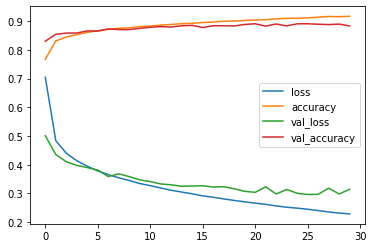

In [16]:
pd.DataFrame(history.history).plot()

In [17]:
model.evaluate(X_test,y_test)

 56/313 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.8917

2022-01-24 18:48:50.106766: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8798


[0.347228467464447, 0.879800021648407]

In [18]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
  36/1719 [..............................] - ETA: 4s - loss: 0.2348 - accuracy: 0.9245

2022-01-24 18:48:51.142098: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1705/1719 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9198

2022-01-24 18:48:56.365220: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 5s 3ms/step - loss: 0.2245 - accuracy: 0.9198 - val_loss: 0.2987 - val_accuracy: 0.8930
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2213 - accuracy: 0.9210 - val_loss: 0.2936 - val_accuracy: 0.8904
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2174 - accuracy: 0.9219 - val_loss: 0.2948 - val_accuracy: 0.8916
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2145 - accuracy: 0.9231 - val_loss: 0.2898 - val_accuracy: 0.8952
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2108 - accuracy: 0.9248 - val_loss: 0.3066 - val_accuracy: 0.8892
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2071 - accuracy: 0.9257 - val_loss: 0.2895 - val_accuracy: 0.8978
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9277 - val_loss: 0.2926 - val_accuracy: 0.8938
Epo

<AxesSubplot:>

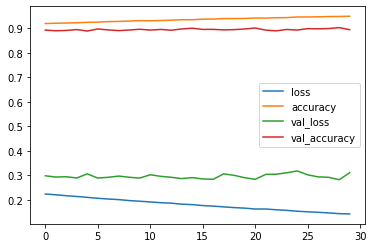

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8867


[0.3420456647872925, 0.8866999745368958]

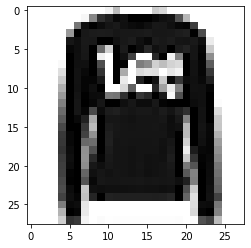

In [21]:
plt.imshow(X_test[1],cmap='binary')

In [22]:
model.predict(np.array([X_test[1]]))

array([[1.8033505e-04, 1.4908039e-10, 9.9543852e-01, 5.0871644e-11,
        4.3780273e-03, 1.4359915e-13, 3.1074583e-06, 7.2982377e-11,
        7.7715312e-10, 5.1115720e-13]], dtype=float32)

In [23]:
y_pred=model.predict(X_test[:3])
y_pred

array([[2.6107605e-07, 5.1352447e-09, 1.3343976e-07, 1.0663631e-07,
        1.7664347e-07, 1.2687620e-04, 1.5784914e-07, 4.2667389e-03,
        1.2342774e-05, 9.9559313e-01],
       [1.8033624e-04, 1.4908097e-10, 9.9543852e-01, 5.0871835e-11,
        4.3780478e-03, 1.4359942e-13, 3.1074730e-06, 7.2982516e-11,
        7.7715606e-10, 5.1115915e-13],
       [1.7146216e-07, 9.9999988e-01, 1.8789903e-09, 2.7315496e-08,
        5.8836835e-10, 3.6354929e-15, 5.9223439e-11, 1.2120742e-15,
        1.1327227e-11, 1.9781465e-13]], dtype=float32)

In [24]:
predicted_classes=[]
for pred in y_pred:
    predicted_classes.append(pred.argmax())
print(predicted_classes)
pred_names=np.array(class_names)[predicted_classes]
pred_names

[9, 2, 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

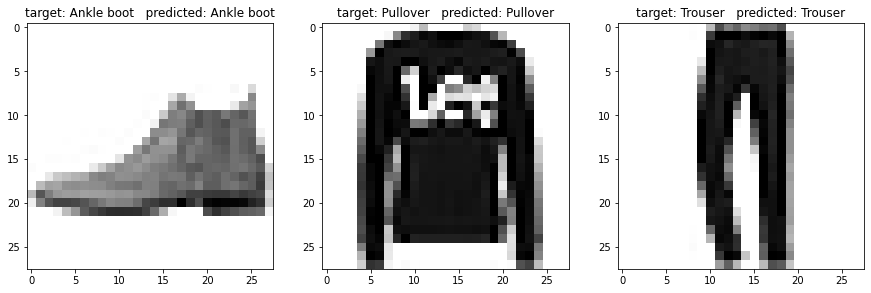

In [25]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)

for i in range(3):
    ax[i].imshow(X_test[i],cmap='binary')
    ax[i].set_title('target: '+str(class_names[y_test[i]])+'   predicted: '+pred_names[i])


## Regression

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8605 - val_loss: 19.8928
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.5373 - val_loss: 0.9549
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4435 - val_loss: 0.4103
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3942 - val_loss: 0.3970
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3817 - val_loss: 0.3873
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3734 - val_loss: 0.4005
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3694 - val_loss: 0.3795
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3643 - val_loss: 0.4003
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3635 - val_loss: 0.3886
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3607 - val_loss: 0.372

<AxesSubplot:>

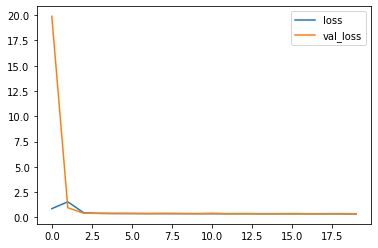

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
X_train[1].shape

(8,)

functional API

### Wide & Deep neural network

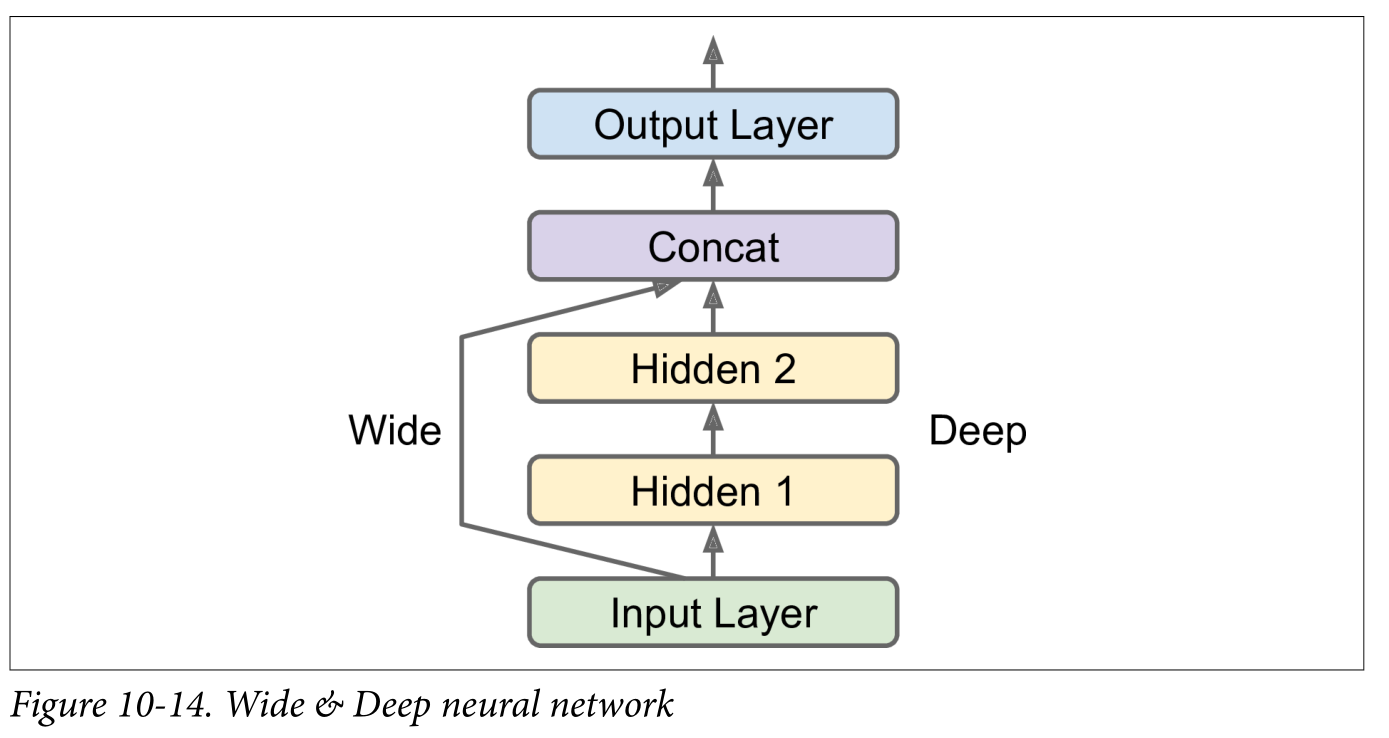

 This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In
contrast, a regular MLP forces all the data to flow through the full stack of layers;

In [30]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])


### multiple inputs

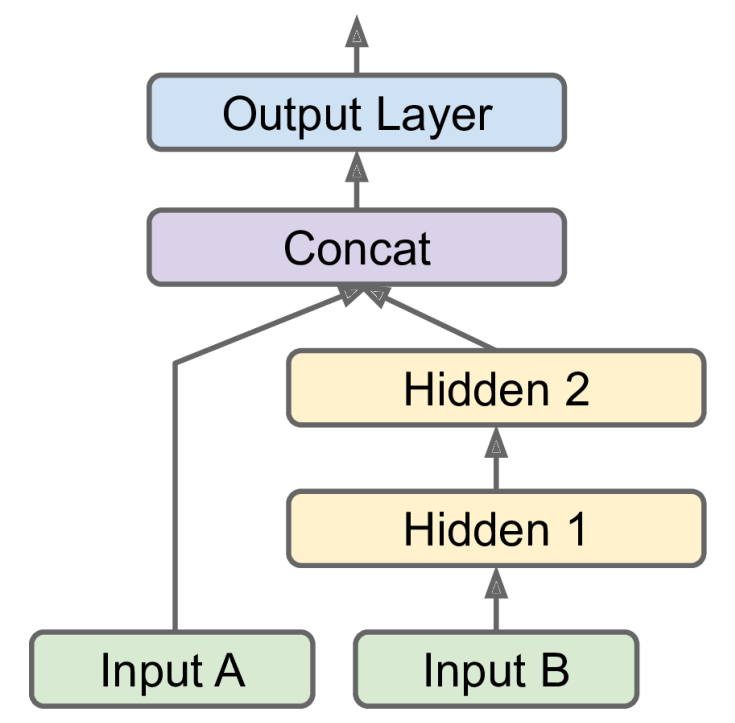

In [31]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])
##
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

/home/bb/.local/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2503 - val_loss: 1.3715
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7831 - val_loss: 0.7431
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6988 - val_loss: 0.6964
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6626 - val_loss: 0.6734
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6322 - val_loss: 0.6297
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6058 - val_loss: 0.6037
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5836 - val_loss: 0.5837
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5638 - val_loss: 0.5722
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5457 - val_loss: 0.5599
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5299 - val_loss: 0.5558

### auxiliary output (can be used for regularization)

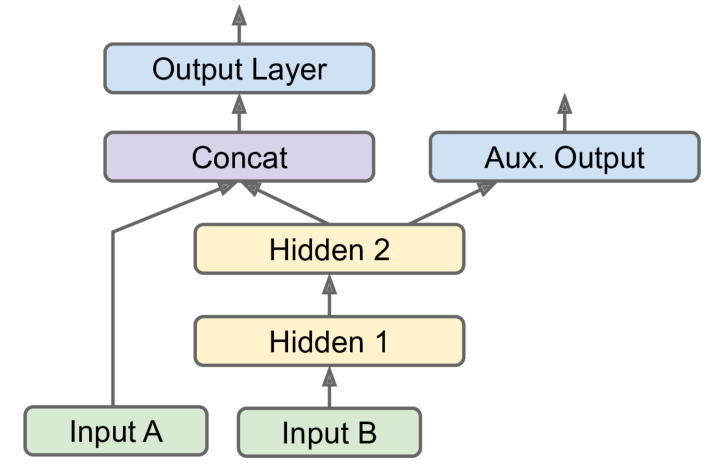

In [32]:
#[...] Same as above, up to the main output layer
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
# because we care more about the main output
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


### Subclassing API

In [33]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

for more flexibility we can use subclass api because we can use conditions and loops in the call function

Saving the model (only works for functional and sequential API)

In [34]:
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")

##  loading
model = keras.models.load_model("my_keras_model.h5")

TypeError: The added layer must be an instance of class Layer. Received: layer=Ellipsis of type <class 'ellipsis'>.

save one at each epoch

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

stop training when the model does not get better after 10 epochs

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [ ]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

testing tensorboard

In [ ]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Exercises

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train_full.shape

In [ ]:
X_train_full,X_test=X_train_full/255.0, X_test/255.0
X_train,X_val= X_train_full[:50000],X_train_full[50000:]
y_train,y_val= y_train_full[:50000],y_train_full[50000:]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

In [ ]:
y_train[1]

In [ ]:
plt.imshow(X_train[1],cmap='binary')

In [ ]:
model.predict(np.array([X_train[1]]))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [ ]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [ ]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.05),
              metrics=["accuracy"])


In [ ]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.1),
              metrics=["accuracy"])

In [ ]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.05),
              metrics=["accuracy"])
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(125, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.05),
              metrics=["accuracy"])
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_cb])